# Trainning CNN

Epoch 1/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 46s 611ms/step - accuracy: 0.5938 - loss: 1.2049 - val_accuracy: 0.2278 - val_loss: 1.3769
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 34s 517ms/step - accuracy: 0.9228 - loss: 0.2373 - val_accuracy: 0.5309 - val_loss: 1.2169
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 34s 514ms/step - accuracy: 0.9663 - loss: 0.1095 - val_accuracy: 0.8552 - val_loss: 0.5235
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 30s 456ms/step - accuracy: 0.9565 - loss: 0.1339 - val_accuracy: 0.5985 - val_loss: 1.4180
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 30s 460ms/step - accuracy: 0.9869 - loss: 0.0539 - val_accuracy: 0.7104 - val_loss: 1.0029
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 41s 453ms/step - accuracy: 0.9866 - loss: 0.0394 - val_accuracy: 0.8282 - val_loss: 0.5493
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 30s 457ms/step - accuracy: 0.9949 - loss: 0.0290 - val_accuracy: 0.7510 - val_loss: 0.9375
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 30s 455ms/step - accuracy: 0.9935 - loss: 0.0290 - 

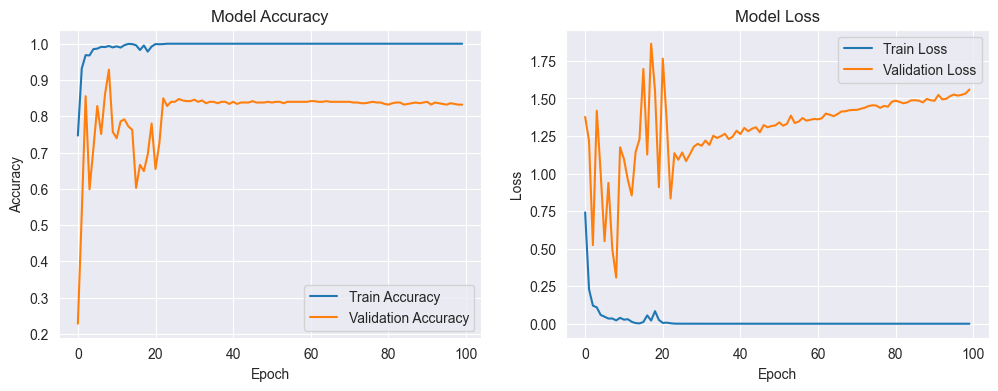

Time taken for training: 3071.42 seconds
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.9660 - loss: 0.4193


Test accuracy: 0.9351432919502258
Time taken for testing: 2.55 seconds


In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import time

class CXRModel:
    def __init__(self, train_images_dir, test_images_dir, num_classes, image_height=150, image_width=150):
        self.train_images_dir = train_images_dir
        self.test_images_dir = test_images_dir
        self.image_height = image_height
        self.image_width = image_width
        self.num_classes = num_classes
        self.model = None

    def load_data(self, images_dir):
        images = []
        labels = []
        for class_id, class_name in enumerate(os.listdir(images_dir)):
            class_dir = os.path.join(images_dir, class_name)
            if os.path.isdir(class_dir):
                for image_file in os.listdir(class_dir):
                    if image_file.endswith('.jpg'):
                        image_path = os.path.join(class_dir, image_file)
                        image = load_img(image_path, target_size=(self.image_height, self.image_width))
                        image = img_to_array(image) / 255.0
                        images.append(image)
                        labels.append(class_id)  
        return np.array(images), np.array(labels)

    def build_model(self):
        input_layer = layers.Input(shape=(self.image_height, self.image_width, 3))
        x = layers.Conv2D(32, (3, 3), activation='relu')(input_layer)
        x = layers.MaxPooling2D(pool_size=(2, 2))(x)
        x = layers.Conv2D(64, (3, 3), activation='relu')(x)
        x = layers.MaxPooling2D(pool_size=(2, 2))(x)
        x = layers.Conv2D(128, (3, 3), activation='relu')(x)
        x = layers.MaxPooling2D(pool_size=(2, 2))(x)
        x = layers.Flatten()(x)
        x = layers.Dense(128, activation='relu')(x)

        # Đầu ra cho lớp
        class_output = layers.Dense(self.num_classes, activation='softmax', name='class_output')(x)

        # Tạo mô hình với đầu ra lớp
        self.model = models.Model(inputs=input_layer, outputs=class_output)

        # Biên dịch mô hình
        self.model.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

    def train(self, epochs=50):
        X_train, y_train = self.load_data(self.train_images_dir)
        y_train = to_categorical(y_train, num_classes=self.num_classes)  # Chuyển đổi nhãn thành one-hot
        start_time = time.time()
        history = self.model.fit(X_train, y_train, epochs=epochs, validation_split=0.2)
        training_time = time.time() - start_time

        self.plot_history(history)
        print(f'Time taken for training: {training_time:.2f} seconds')

    def evaluate(self):
        X_test, y_test = self.load_data(self.test_images_dir)
        y_test = to_categorical(y_test, num_classes=self.num_classes)  # Chuyển đổi nhãn thành one-hot
        start_time = time.time()
        test_loss, test_acc = self.model.evaluate(X_test, y_test)
        testing_time = time.time() - start_time

        print(f'Test accuracy: {test_acc}')
        print(f'Time taken for testing: {testing_time:.2f} seconds')

    def plot_history(self, history):
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.show()

    def save_model(self, model_path='final_model.h5'):
        self.model.save(model_path)

num_classes = 4  
train_images_dir = 'D:\\Introduction for AI\\AIFinal\\data\\trainCNN_LungCT_crop'
test_images_dir = 'D:\\Introduction for AI\\AIFinal\\data\\validCNN_LungCT_crop'

cxr_model = CXRModel(train_images_dir, test_images_dir, num_classes)
cxr_model.build_model()
cxr_model.train(epochs=100)
cxr_model.evaluate()
cxr_model.save_model()

# Đánh giá mô hình

Found 663 images belonging to 4 classes.


C:\Users\hoabu\PycharmProjects\pythonProject\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9674 - loss: 0.4088
Loss: 0.7393, Accuracy: 0.9351
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        77
           1       0.89      0.96      0.92       213
           2       0.96      0.99      0.97       176
           3       0.97      0.84      0.90       197

    accuracy                           0.94       663
   macro avg       0.94      0.94      0.94       663
weighted avg       0.94      0.94      0.93       663



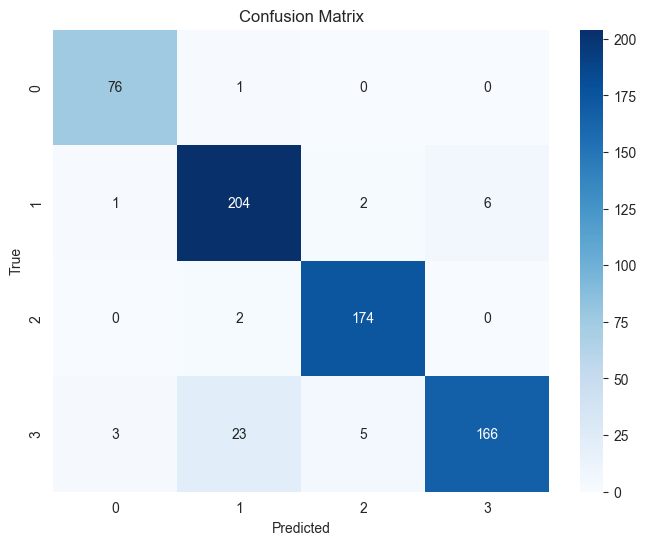

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Đường dẫn đến thư mục kiểm tra
test_dir = 'D:\\Introduction for AI\\AIFinal\\data\\validCNN_LungCT_crop'
# Chuẩn bị dữ liệu 
test_datagen = ImageDataGenerator(rescale=1./255)  
test_generator = test_datagen.flow_from_directory(
    test_dir,  
    target_size=(150, 150),  
    batch_size=16,
    class_mode='categorical',  
    shuffle=False) 

# Tải mô hình đã huấn luyện
model = tf.keras.models.load_model('final_model.h5')

# Đánh giá mô hình 
loss, accuracy = model.evaluate(test_generator)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
predictions = model.predict(test_generator, batch_size=16)
true_labels = test_generator.classes
predicted_labels = np.argmax(predictions, axis=1)

# In ra báo cáo
report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices.keys())
print(report)
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Dự đoán trên 1 tập ảnh

In [14]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# Tải mô hình đã huấn luyện
model = tf.keras.models.load_model('D:\\Introduction for AI\\AIFinal\\Pycode\\final_model.h5')
# Thư mục chứa các ảnh kiểm tra
test_image_folder = 'D:\\Introduction for AI\\AIFinal\\data\\validCNN_LungCT_crop\\1'

# Hàm đọc và tiền xử lý ảnh
def preprocess_image(img_path, target_size=(150, 150)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) 
    img_array = np.expand_dims(img_array, axis=0)  
    img_array = img_array / 255.0  
    return img_array

# Dự đoán các ảnh trong thư mục
def classify_images_in_folder(folder_path):
    image_paths = [os.path.join(folder_path, fname) for fname in os.listdir(folder_path) if fname.endswith('.jpg') or fname.endswith('.png')]
    for img_path in image_paths:
        processed_image = preprocess_image(img_path)
        predictions = model.predict(processed_image)
        predicted_label = np.argmax(predictions, axis=1)
        print(f"Image: {img_path}, Predicted Label: {predicted_label[0]}")

classify_images_in_folder(test_image_folder)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Image: D:\Introduction for AI\AIFinal\data\validCNN_LungCT_crop\1\-101-2018077075-1042-itS2-467243-1_00012_jpg.rf.a84dc5fb5805501f38f4d7de551b7421.txt_189_158.jpg, Predicted Label: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Image: D:\Introduction for AI\AIFinal\data\validCNN_LungCT_crop\1\-101-2018077075-5027-itS2-467192-1_00011_jpg.rf.43d24e6a8088c6fc131b67f6c08dd8a6.txt_186_154.jpg, Predicted Label: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Image: D:\Introduction for AI\AIFinal\data\validCNN_LungCT_crop\1\-101-2018077075-9a47-itS2-467198-1_00010_jpg.rf.a6cdd8595e09bcc523df4651e5d6db1b.txt_192_162.jpg, Predicted Label: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Image: D:\Introduction for AI\AIFinal\data\validCNN_LungCT_crop\1\-101-2021020374-1cfc-itS1-2964918-1_00000_jpg.rf.6ed83e2c4c0d27391b0a5fdf1113da13.txt_116_270.jpg, Predicted Label: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Image: D:\Introduction for AI\AIFinal\data\validCNN_LungCT_crop\1\-101-202102